In [1]:
%reload_ext mocodo
from mocodo.magic import mocodo
import mcd_mocodo as mcd

Mocodo 4.2.4 loaded.


In [2]:
def generer_mcd(domaine:str, ga:bool=False,seed:float=1):
    """
    Genère un graphe MCD à partir d'un domaine exprimé en MCD mocodo

    :param domaine: Le domaine exprimé en MCD mocodo
    :type domaine: str
    :param ga: Utiliser l'algorithme génétique pour arranger les entités, par défaut False
    :type ga: bool, optional
    :param seed: La graine pour le réarangement des entités, par défaut 1
    :type seed: float, optional

    """
    return mocodo(f"""
    %mocodo --colors ocean -t arrange{":algo=ga" if ga else ""} --seed {seed} --detect_overlaps --select mcd
    {domaine}
    """)


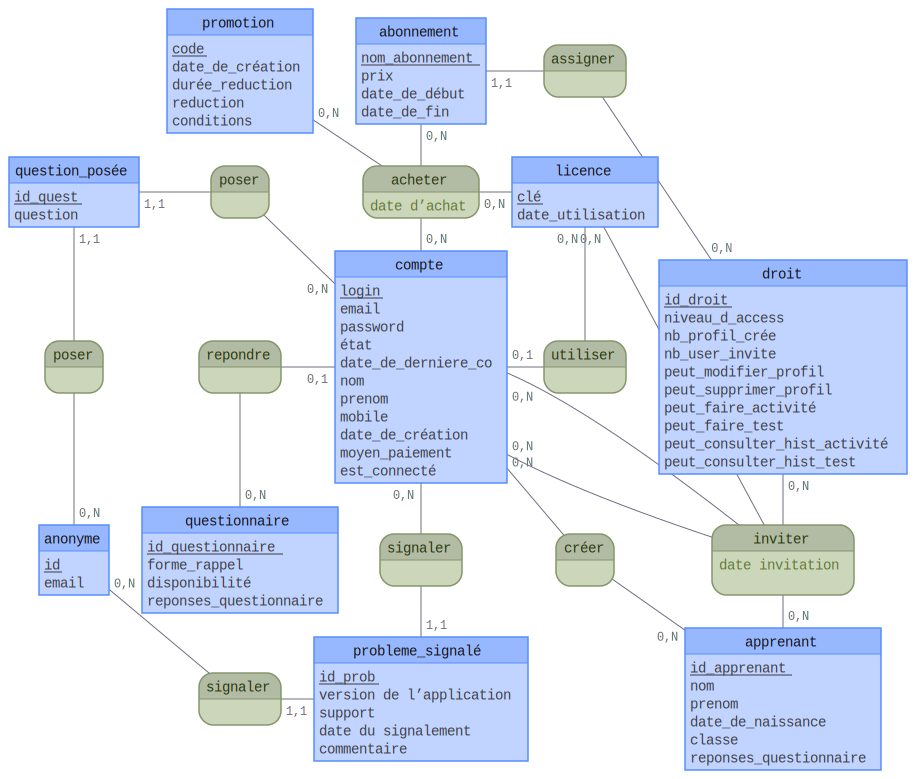

In [3]:
generer_mcd(mcd.auth,seed=4)

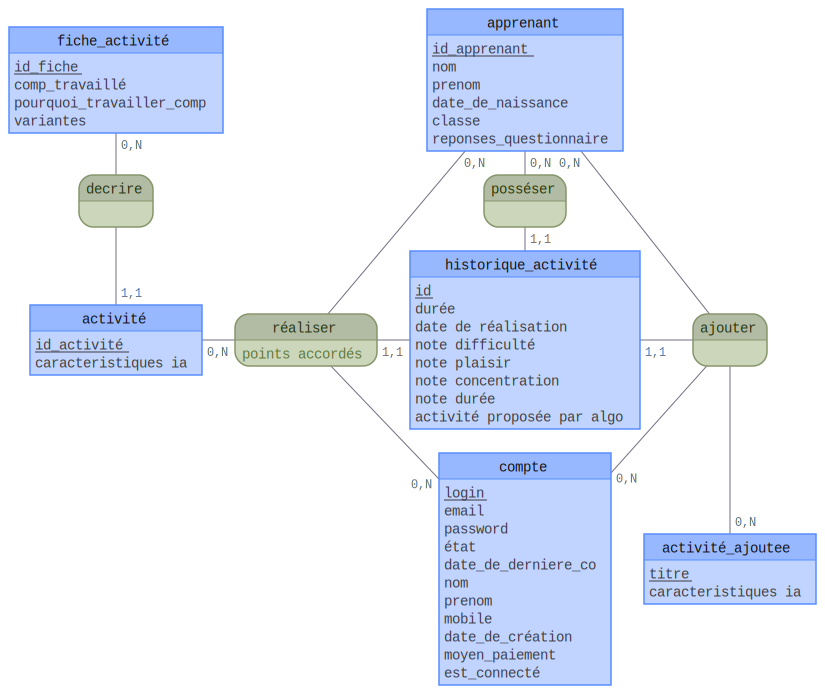

In [4]:
generer_mcd(mcd.activites,seed=2)

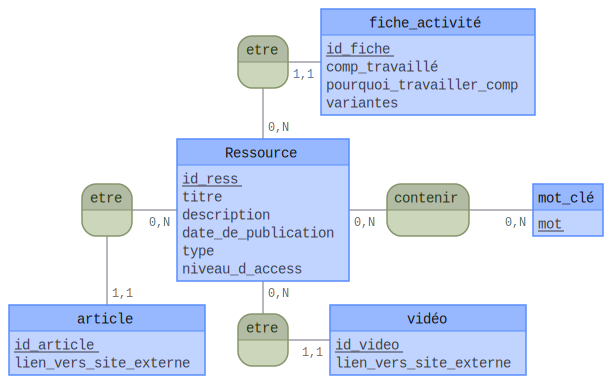

In [5]:
generer_mcd(mcd.ressources,seed=2)

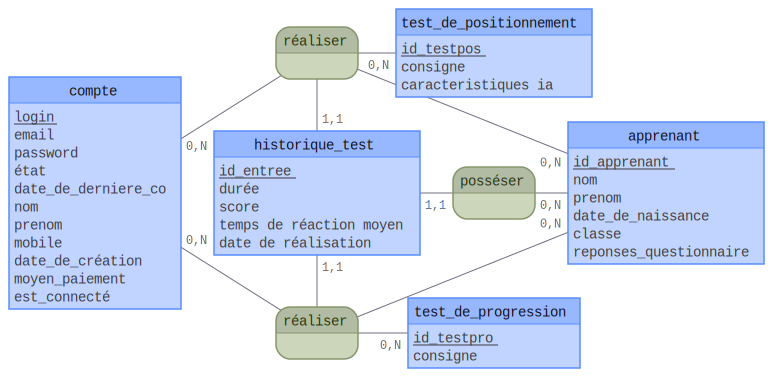

In [6]:
generer_mcd(mcd.test,seed=3)

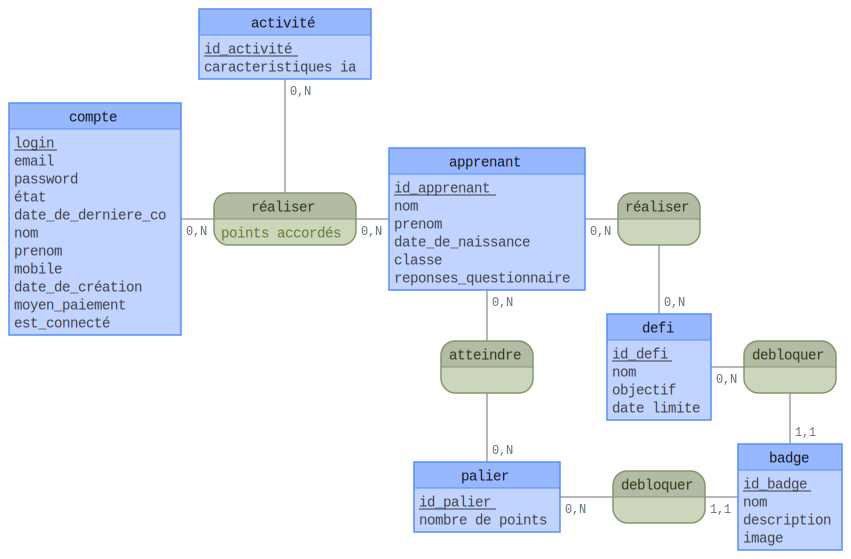

In [7]:
generer_mcd(mcd.recompenses,seed=3)

In [11]:
def generer_mmd(domaine:str):
    """
    Genère un graphe Mermaid Crowfoot notation à partir d'un domaine exprimé en MCD mocodo.
    
    :param domaine: Le domaine exprimé en MCD mocodo
    :type domaine: str
    """

    return mocodo(f"""
    %mocodo --colors ocean -t crow:mmd
    {domaine}
    """)
    

In [10]:
generer_mmd(mcd.texte_complet)


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
mocodo_notebook/sandbox_erd_crow.mmd
</tt>
</span>
</div>


```mmd
erDiagram
  licence {
    TYPE cle PK
    TYPE date_utilisation
  }
  promotion {
    TYPE code PK
    TYPE date_de_creation
    TYPE duree_reduction
    TYPE reduction
    TYPE conditions
  }
  abonnement {
    TYPE nom_abonnement PK
    TYPE prix
    TYPE date_de_debut
    TYPE date_de_fin
  }
  droit {
    TYPE id_droit PK
    TYPE niveau_d_access
    TYPE nb_profil_cree
    TYPE nb_user_invite
    TYPE peut_modifier_profil
    TYPE peut_supprimer_profil
    TYPE peut_faire_activite
    TYPE peut_faire_test
    TYPE peut_consulter_hist_activite
    TYPE peut_consulter_hist_test
  }
  questionnaire {
    TYPE id_questionnaire PK
    TYPE forme_rappel
    TYPE disponibilite
    TYPE reponses_questionnaire
  }
  probleme_signale {
    TYPE id_prob PK
    TYPE version_de_l_application
    TYPE support
    TYPE date_du_signalement
    TYPE commentaire
  }
  question_posee {
    TYPE id_quest PK
    TYPE question
  }
  anonyme {
    TYPE id PK
    TYPE email
  }
  inviter {
    TYPE date_invitation PK
    TYPE 
  }
  acheter {
    TYPE date_d_achat PK
  }
  activite_ajoutee {
    TYPE titre PK
    TYPE caracteristiques_ia
  }
  historique_activite {
    TYPE id PK
    TYPE duree
    TYPE date_de_realisation
    TYPE note_difficulte
    TYPE note_plaisir
    TYPE note_concentration
    TYPE note_duree
    TYPE activite_proposee_par_algo
    TYPE points_accordes
  }
  palier {
    TYPE id_palier PK
    TYPE nombre_de_points
  }
  defi {
    TYPE id_defi PK
    TYPE nom
    TYPE objectif
    TYPE date_limite
  }
  badge {
    TYPE id_badge PK
    TYPE nom
    TYPE description
    TYPE image
  }
  mot_cle {
    TYPE mot PK
  }
  Ressource {
    TYPE id_ress PK
    TYPE titre
    TYPE description
    TYPE date_de_publication
    TYPE type
    TYPE niveau_d_access
  }
  video {
    TYPE id_video PK
    TYPE lien_vers_site_externe
  }
  article {
    TYPE id_article PK
    TYPE lien_vers_site_externe
  }
  test_de_positionnement {
    TYPE id_testpos PK
    TYPE consigne
    TYPE caracteristiques_ia
  }
  test_de_progression {
    TYPE id_testpro PK
    TYPE consigne
  }
  historique_test {
    TYPE id_entree PK
    TYPE duree
    TYPE score
    TYPE temps_de_reaction_moyen
    TYPE date_de_realisation
  }
  apprenant {
    TYPE id_apprenant PK
    TYPE nom
    TYPE prenom
    TYPE date_de_naissance
    TYPE classe
    TYPE reponses_questionnaire
  }
  compte {
    TYPE login PK
    TYPE email
    TYPE password
    TYPE etat
    TYPE date_de_derniere_co
    TYPE nom
    TYPE prenom
    TYPE mobile
    TYPE date_de_creation
    TYPE moyen_paiement
    TYPE est_connecte
  }
  fiche_activite {
    TYPE id_fiche PK
    TYPE comp_travaille
    TYPE pourquoi_travailler_comp
    TYPE variantes
  }
  activite {
    TYPE id_activite PK
    TYPE caracteristiques_ia
  }
  inviter }o..|| compte: DF
  inviter }o..|| compte: DF
  inviter }o..|| apprenant: DF
  inviter }o..|| droit: DF
  inviter }o..|| licence: DF
  compte }o--o| licence: utiliser
  compte }o--o| questionnaire: repondre
  compte }o--o{ apprenant: creer
  acheter }o..|| compte: DF
  acheter }o..|| promotion: DF
  acheter }o..|| licence: DF
  acheter }o..|| abonnement: DF
  abonnement }o--|| droit: assigner
  question_posee }o--|| anonyme: poser
  question_posee }o--|| compte: poser
  probleme_signale }o--|| anonyme: signaler
  probleme_signale }o--|| compte: signaler
  historique_activite }o--|| compte: realiser
  historique_activite }o--|| activite: realiser
  historique_activite }o--|| apprenant: realiser
  historique_activite }o--|| compte: ajouter
  historique_activite }o--|| activite_ajoutee: ajouter
  historique_activite }o--|| apprenant: ajouter
  historique_activite }o--|| apprenant: posseser
  fiche_activite ||--o{ activite: decrire
  apprenant }o--o{ palier: atteindre
  apprenant }o--o{ defi: realiser
  defi ||--o{ badge: debloquer
  palier ||--o{ badge: debloquer
  mot_cle }o--o{ Ressource: contenir
  Ressource ||--o{ video: etre
  Ressource ||--o{ article: etre
  Ressource ||--o{ fiche_activite: etre
  historique_test }o--|| compte: realiser1
  historique_test }o--|| test_de_progression: realiser1
  historique_test }o--|| apprenant: realiser1
  historique_test }o--|| compte: realiser2
  historique_test }o--|| test_de_positionnement: realiser2
  historique_test }o--|| apprenant: realiser2
  historique_test }o--|| apprenant: posseser

```

In [ ]:
def generer_types(domaine:str):
    """
    Infère les types des attribut d'un domaine exprimé en MCD mocodo.
    
    :param domaine: Le domaine exprimé en MCD mocodo
    :type domaine: str
    """
    return mocodo(f"""
    %mocodo -t create:types=TODO --select rw
    {domaine}
    """)

def generer_mld(domaine:str):
    """
    Genère un MLD textuel à partir d'un domaine exprimé en MCD mocodo.
    
    :param domaine: Le domaine exprimé en MCD mocodo
    :type domaine: str
    """
    return mocodo(f"""
    %mocodo -t mld
    {domaine}
    """)